In [2]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)


In [3]:
A = pd.DataFrame({'표본표준편차' : [2.1 , 2.7] , '표본의 크기' : [8 , 10]})
A.index = ['남자' ,'여자']
A

,표본표준편차,표본의 크기
남자,2.1,8
여자,2.7,10


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


4.197046636945515


Text(0.5, 1.0, '양측 검정')

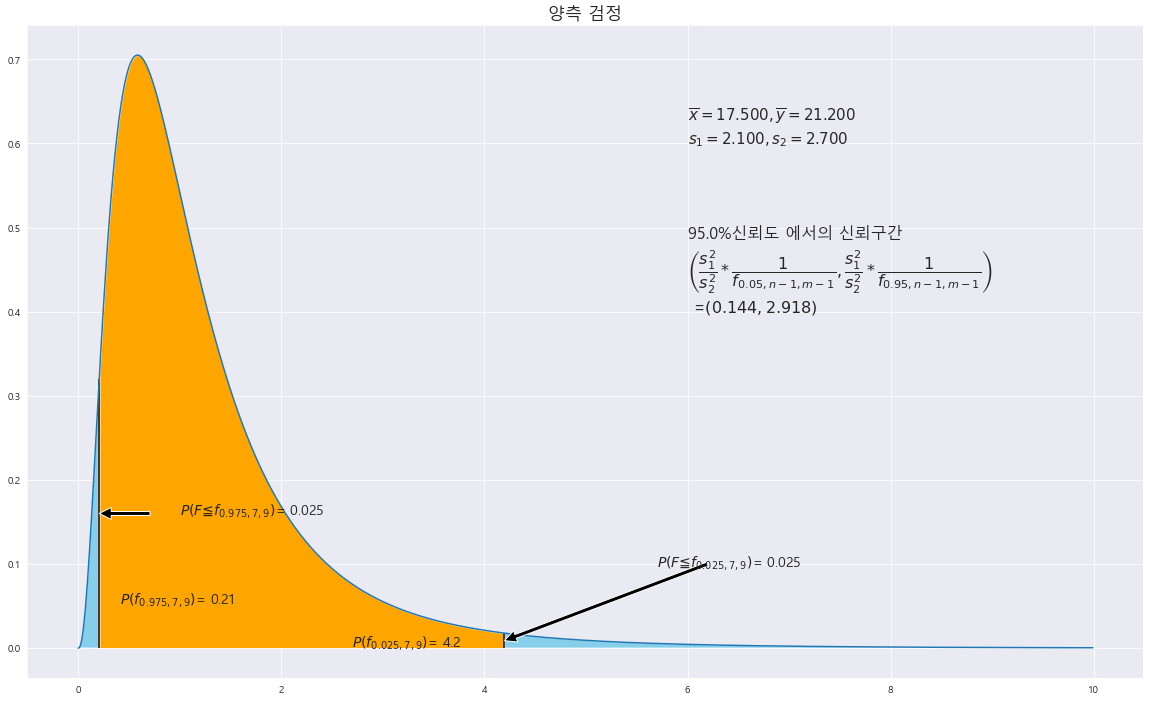

In [4]:
X = np.arange(0,10, .01)

fig = plt.figure(figsize=(20,12))


# A = '12.5 11.5 6.0 5.5 15.5 11.5 10.5 17.5 10.0 9.5 13.5 8.5 11.5 15.5'
# A= list(map(float , A.split(' ')))

# Vars = np.var(A , ddof=1)
Vars = 0.2**2
n = 8
m = 10
dof = [[n-1 , m-1]] #자유도

trust = 95
trust = round((1- trust/100)/2,3)



sample_x = 17.5
stand_x = 2.1 # 표본표준편차

sample_y = 21.2
stand_y = 2.7

STDS = math.sqrt(Vars)
MO_std = 0.3


for i in dof:
    ax = sns.lineplot(X , scipy.stats.f(i[0] , i[1]).pdf(X))




X_r = scipy.stats.f(dof[0][0], dof[0][1]).ppf(1-trust)

X_l = scipy.stats.f(dof[0][0], dof[0][1]).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)



ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')
ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔


ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/2), xytext=(X_r+2 ,.1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2), xytext=(X_l + .5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2)  , arrowprops = dict(facecolor = 'black'))
area = round(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_r) ,4)
ax.text(X_r+1.5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) + .08 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)
ax.text(X_l + .8 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)

ax.text(X_l + 0.2 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/6 , r'$P(f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) +   f'= {round(X_l , 2)}' , fontsize = 14)
ax.text(X_r - 1.5, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/6, r'$P(f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1])  + f'= {round(X_r , 2)}'  , fontsize = 14)


ax.text(6 , 0.6 , r'$\overline{x} = {%.3f} , \overline{y} = {%.3f}$' % (sample_x, sample_y) + f'\n' + r'$s_1 = {%.3f} , s_2 = {%.3f}$' %(stand_x, stand_y), fontsize = 15)
ax.text(6 , 0.4 , f'{ (1- (trust*2))*100}%신뢰도 에서의 신뢰구간\n' + r'$\left(\dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.05 , n-1 , m-1}} , \dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.95 , n-1 , m-1}}\right)$' + f'\n =' + r'$\left( {%.3f} , {%.3f} \right)$' % (round(stand_x**2 / stand_y**2 / X_r,4) , round(stand_x**2 / stand_y**2 / X_l,4))  , fontsize = 16)

# #=================================가설검정=====================================
#
ax.set_title('양측 검정' , fontsize = 17)
#
# X_L_1 = (n-1) * Vars / (MO_std**2) #검정값
# print(f'X_L_1 : {X_L_1}' )
# X_L_1 = abs(round(X_L_1,4))
#
# X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
# print(X_R_1)

# ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔
#
#
# area = round(float(scipy.stats.chi2(dof_2).cdf(X_L_1) + 1 - (scipy.stats.chi2(dof_2).cdf(X_R_1))),4)
#
#
# ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# #
# annotate_len = stats.chi2(dof_2).pdf(X_R_1) /2
# plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# ax.text( (X_R_1-X_L_1)/2 + 5, annotate_len+0.005 , f'P-value : \nP(X<={X_L_1}) + P(X>={X_R_1}) \n = {area}',fontsize=15)



In [5]:
A = pd.DataFrame({'표본평균' : [201 , 199] , '표본표준편차' : [6.2 , 5.4] , '표본의 크기' : [6 ,9]})
A.index = ['표본 A' ,'표본 B']
A

,표본평균,표본표준편차,표본의 크기
표본 A,201,6.2,6
표본 B,199,5.4,9


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3.6874986663400273


Text(0.5, 1.0, '양측 검정')

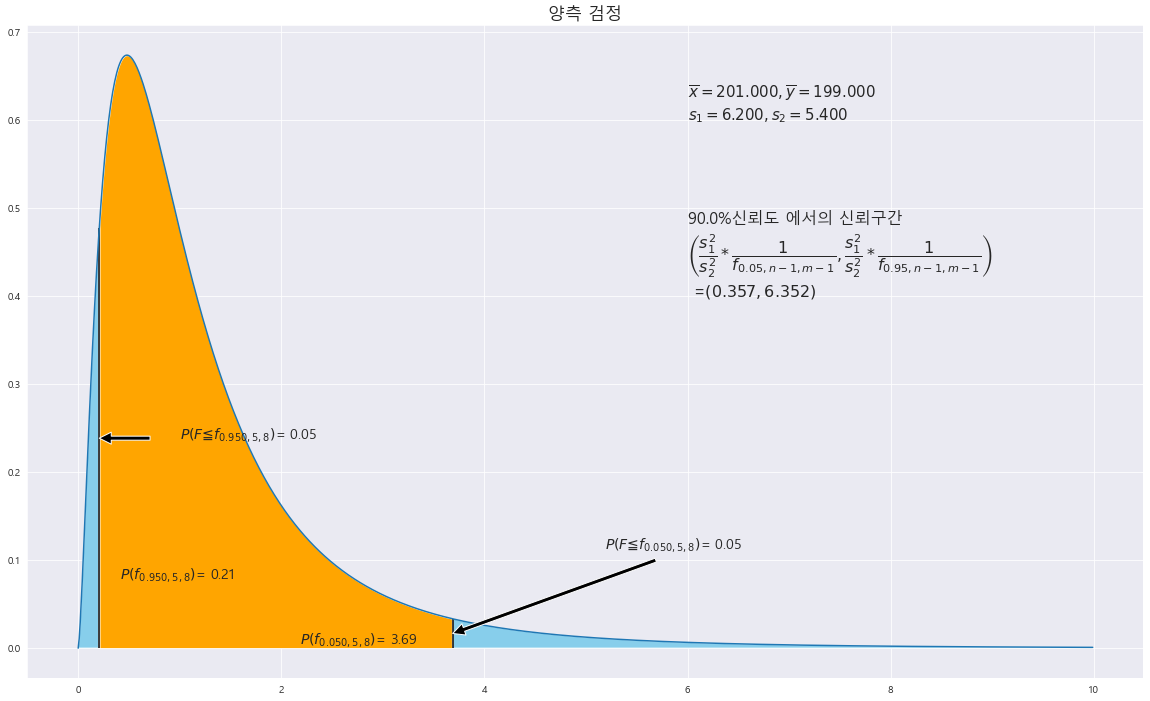

In [6]:
X = np.arange(0,10, .01)

fig = plt.figure(figsize=(20,12))


# A = '12.5 11.5 6.0 5.5 15.5 11.5 10.5 17.5 10.0 9.5 13.5 8.5 11.5 15.5'
# A= list(map(float , A.split(' ')))

# Vars = np.var(A , ddof=1)
# Vars = 0.2**2
n = 6
m = 9
dof = [[n-1 , m-1]] #자유도

trust = 90
trust = round((1- trust/100)/2,3)



sample_x = 201
stand_x = 6.2 # 표본표준편차

sample_y = 199
stand_y = 5.4

#STDS = math.sqrt(Vars)
#MO_std = 0.3


for i in dof:
    ax = sns.lineplot(X , scipy.stats.f(i[0] , i[1]).pdf(X))




X_r = scipy.stats.f(dof[0][0], dof[0][1]).ppf(1-trust)

X_l = scipy.stats.f(dof[0][0], dof[0][1]).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)



ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')
ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔


ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/2), xytext=(X_r+2 ,.1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2), xytext=(X_l + .5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2)  , arrowprops = dict(facecolor = 'black'))
area = round(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_r) ,4)
ax.text(X_r+1.5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) + .08 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)
ax.text(X_l + .8 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)

ax.text(X_l + 0.2 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/6 , r'$P(f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) +   f'= {round(X_l , 2)}' , fontsize = 14)
ax.text(X_r - 1.5, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/6, r'$P(f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1])  + f'= {round(X_r , 2)}'  , fontsize = 14)


ax.text(6 , 0.6 , r'$\overline{x} = {%.3f} , \overline{y} = {%.3f}$' % (sample_x, sample_y) + f'\n' + r'$s_1 = {%.3f} , s_2 = {%.3f}$' %(stand_x, stand_y), fontsize = 15)
ax.text(6 , 0.4 , f'{ (1- (trust*2))*100}%신뢰도 에서의 신뢰구간\n' + r'$\left(\dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.05 , n-1 , m-1}} , \dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.95 , n-1 , m-1}}\right)$' + f'\n =' + r'$\left( {%.3f} , {%.3f} \right)$' % (round(stand_x**2 / stand_y**2 / X_r,4) , round(stand_x**2 / stand_y**2 / X_l,4))  , fontsize = 16)

# #=================================가설검정=====================================
#
ax.set_title('양측 검정' , fontsize = 17)
#
# X_L_1 = (n-1) * Vars / (MO_std**2) #검정값
# print(f'X_L_1 : {X_L_1}' )
# X_L_1 = abs(round(X_L_1,4))
#
# X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
# print(X_R_1)

# ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔
#
#
# area = round(float(scipy.stats.chi2(dof_2).cdf(X_L_1) + 1 - (scipy.stats.chi2(dof_2).cdf(X_R_1))),4)
#
#
# ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# #
# annotate_len = stats.chi2(dof_2).pdf(X_R_1) /2
# plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# ax.text( (X_R_1-X_L_1)/2 + 5, annotate_len+0.005 , f'P-value : \nP(X<={X_L_1}) + P(X>={X_R_1}) \n = {area}',fontsize=15)



C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


5.192167772803923


Text(0.5, 1.0, '양측 검정')

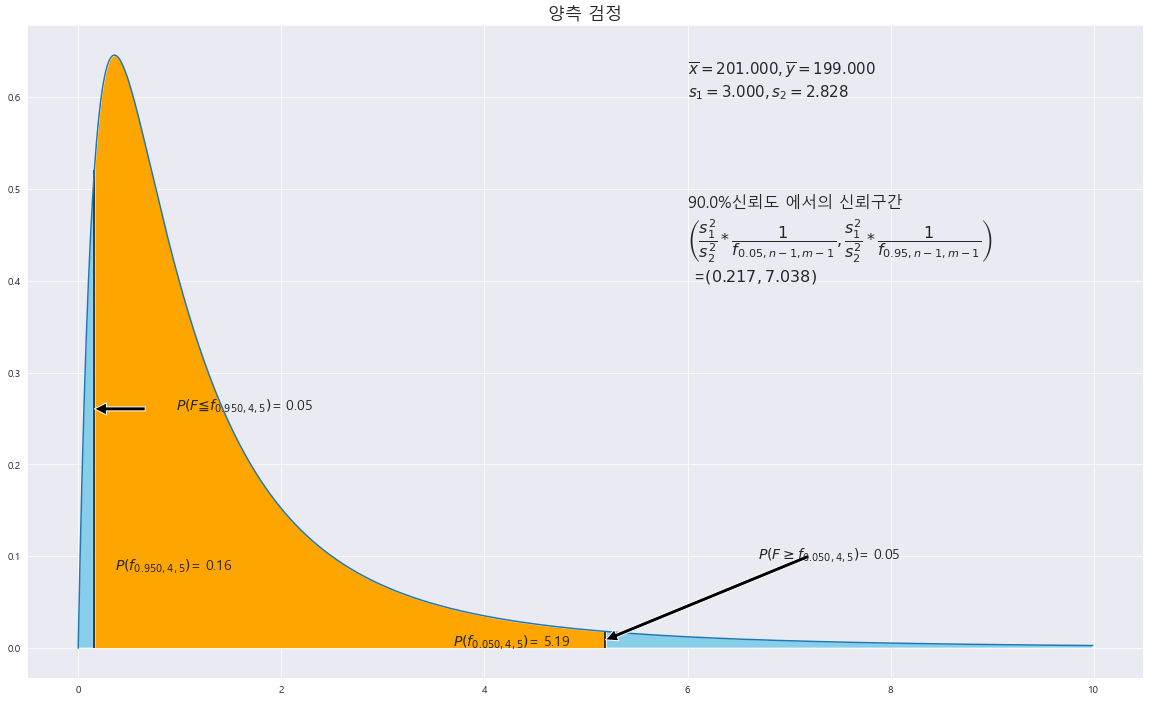

In [7]:
X = np.arange(0,10, .01)

fig = plt.figure(figsize=(20,12))


# A = '12.5 11.5 6.0 5.5 15.5 11.5 10.5 17.5 10.0 9.5 13.5 8.5 11.5 15.5'
# A= list(map(float , A.split(' ')))

# Vars = np.var(A , ddof=1)
# Vars = 0.2**2
n = 5
m = 6
dof = [[n-1 , m-1]] #자유도

trust = 90
trust = round((1- trust/100)/2,3)



sample_x = 201
stand_x = math.sqrt(9) # 표본표준편차

sample_y = 199
stand_y = math.sqrt(8)

#STDS = math.sqrt(Vars)
#MO_std = 0.3


for i in dof:
    ax = sns.lineplot(X , scipy.stats.f(i[0] , i[1]).pdf(X))




X_r = scipy.stats.f(dof[0][0], dof[0][1]).ppf(1-trust)

X_l = scipy.stats.f(dof[0][0], dof[0][1]).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)



ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')
ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔


ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/2), xytext=(X_r+2 ,.1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2), xytext=(X_l + .5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2)  , arrowprops = dict(facecolor = 'black'))
area = round(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_r) ,4)
ax.text(X_r+1.5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) + .08 , r'$P(F\geq f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)
ax.text(X_l + .8 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)

ax.text(X_l + 0.2 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/6 , r'$P(f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) +   f'= {round(X_l , 2)}' , fontsize = 14)
ax.text(X_r - 1.5, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/6, r'$P(f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1])  + f'= {round(X_r , 2)}'  , fontsize = 14)


ax.text(6 , 0.6 , r'$\overline{x} = {%.3f} , \overline{y} = {%.3f}$' % (sample_x, sample_y) + f'\n' + r'$s_1 = {%.3f} , s_2 = {%.3f}$' %(stand_x, stand_y), fontsize = 15)
ax.text(6 , 0.4 , f'{ (1- (trust*2))*100}%신뢰도 에서의 신뢰구간\n' + r'$\left(\dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.05 , n-1 , m-1}} , \dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.95 , n-1 , m-1}}\right)$' + f'\n =' + r'$\left( {%.3f} , {%.3f} \right)$' % (round(stand_x**2 / stand_y**2 / X_r,4) , round(stand_x**2 / stand_y**2 / X_l,4))  , fontsize = 16)

# #=================================가설검정=====================================
#
ax.set_title('양측 검정' , fontsize = 17)
#
# X_L_1 = (n-1) * Vars / (MO_std**2) #검정값
# print(f'X_L_1 : {X_L_1}' )
# X_L_1 = abs(round(X_L_1,4))
#
# X_R_1 = round(float(scipy.stats.chi2(dof_2).ppf(1- scipy.stats.chi2(dof_2).cdf(X_L_1))),4)
# print(X_R_1)

# ax.fill_between(X, scipy.stats.chi2(dof_2).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔
#
#
# area = round(float(scipy.stats.chi2(dof_2).cdf(X_L_1) + 1 - (scipy.stats.chi2(dof_2).cdf(X_R_1))),4)
#
#
# ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.chi2(dof_2).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# #
# annotate_len = stats.chi2(dof_2).pdf(X_R_1) /2
# plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1-X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# ax.text( (X_R_1-X_L_1)/2 + 5, annotate_len+0.005 , f'P-value : \nP(X<={X_L_1}) + P(X>={X_R_1}) \n = {area}',fontsize=15)



In [8]:
A = pd.DataFrame({'평균' : [ 1854 , 1684] , '표준편차' : [69.9 , 73.3]})
A.index = ['울산' ,'서울']
A

,평균,표준편차
울산,1854,69.9
서울,1684,73.3


|x : 1854
s_x : 69.9
|y : 1684
s_y : 73.3


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.9722156217620566
X_R_1 : 1.0996


<ipython-input-9-7d95ba252a62>:71: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(6 , 0.2 ,  r'$\alpha = {%.3f}$' % ((area)) +'\n' + r'$H_0 : \sigma^2_A = \sigma^2_B$' , Fontsize = 15 )


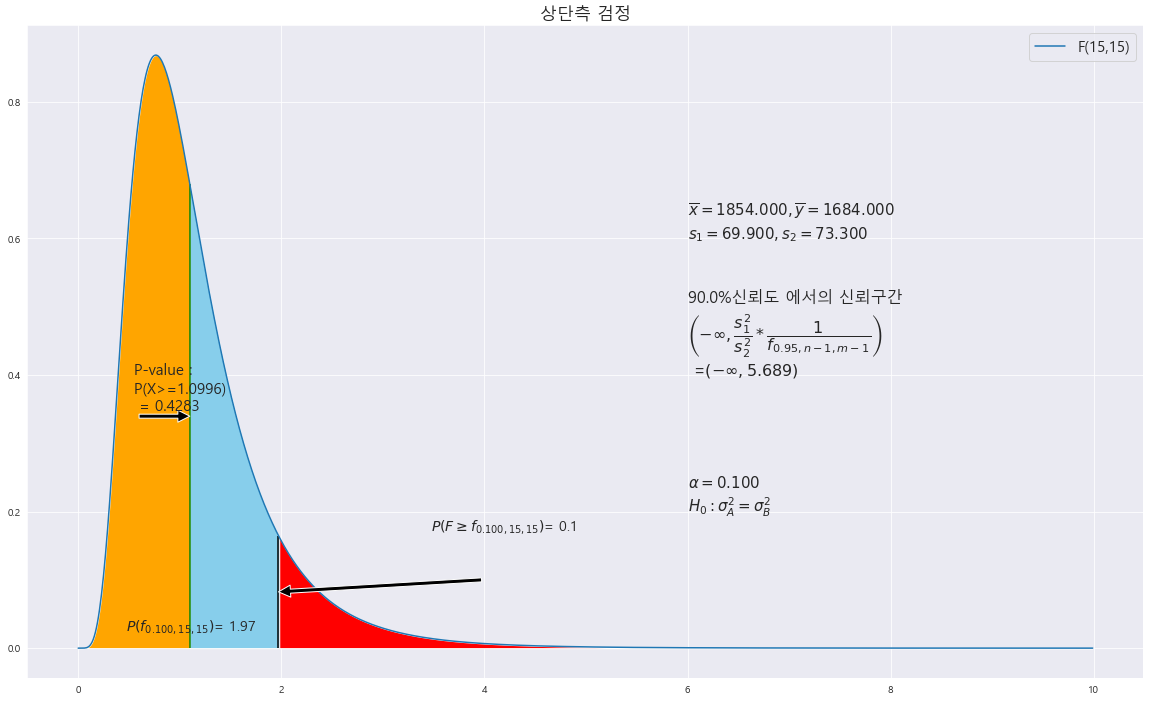

In [9]:
X = np.arange(0,10, .01)

fig = plt.figure(figsize=(20,12))


# A = '72 75 75 80 100 110 125 150 160 200'
# B = '50 60 72 90 100 125 125 130 132 170'
#
# A = list(map(int , A.split()))
# B = list(map(int ,B.split()))

# Vars = np.var(A , ddof=1)
# Vars = 0.2**2
n = 16
m = 16
dof = [[n-1 , m-1]] #자유도

trust = 90
trust = round((1- trust/100),3)



sample_x = 1854
stand_x = 69.9
print(f'|x : {sample_x}')
print(f's_x : {stand_x}')
sample_y = 1684
stand_y = 73.3
print(f'|y : {sample_y}')
print(f's_y : {stand_y}')
#
# STDS = math.sqrt(Vars)
# MO_std = 0.3




for i in dof:
    ax = sns.lineplot(X , scipy.stats.f(i[0] , i[1]).pdf(X))




X_r = scipy.stats.f(dof[0][0], dof[0][1]).ppf(1-trust)

# X_l = scipy.stats.f(dof[0][0], dof[0][1]).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)



ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X<=X_r)  , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) , colors = 'black')
# ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/2), xytext=(X_r+2 ,.1)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(X_l , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2), xytext=(X_l + .5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2)  , arrowprops = dict(facecolor = 'black'))
area = round(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_r) ,4)
ax.text(X_r+1.5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) + .008 , r'$P(F\geq f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)
# ax.text(X_l + .8 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)

# ax.text(X_l + 0.2 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/6 , r'$P(f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) +   f'= {round(X_l , 2)}' , fontsize = 14)
ax.text(X_r - 1.5, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/6, r'$P(f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1])  + f'= {round(X_r , 2)}'  , fontsize = 14)


ax.text(6 , 0.6 , r'$\overline{x} = {%.3f} , \overline{y} = {%.3f}$' % (sample_x, sample_y) + f'\n' + r'$s_1 = {%.3f} , s_2 = {%.3f}$' %(stand_x, stand_y), fontsize = 15)
ax.text(6 , 0.4 , f'{ (1- (trust))*100}%신뢰도 에서의 신뢰구간\n' + r'$\left(-\infty , \dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.95 , n-1 , m-1}}\right)$' + f'\n =' + r'$\left(-\infty , {%.3f} \right)$' % (round(stand_x**2 / stand_y**2 / X_l,4))  , fontsize = 16)

ax.text(6 , 0.2 ,  r'$\alpha = {%.3f}$' % ((area)) +'\n' + r'$H_0 : \sigma^2_A = \sigma^2_B$' , Fontsize = 15 )

# #=================================가설검정=====================================
ax.set_title('상단측 검정' , fontsize = 17)
X_L_1 = stand_x**2 / stand_y**2 #검정값

X_L_1 = abs(round(X_L_1,4))
if scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1) < 0.5:
    X_R_1 = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1))),4)
else:
    X_R_1 = X_L_1
    X_L_1 = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1))),4)
print(f'X_R_1 : {X_R_1}' )
# print(f'X_L_1 : {X_L_1}' )

ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_R_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_r)  , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔
#
area = round(float( 1 - (scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_R_1))),4)
#
# #
# ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.f(dof[0][0] , dof[0][1]).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.f(dof[0][0] , dof[0][1]).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# #
annotate_len = stats.f(dof[0][0] , dof[0][1]).pdf(X_R_1) /2
# plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1+X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1) -.5, annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_R_1)/2 , annotate_len+0.008 , f'P-value : \nP(X>={X_R_1}) \n = {area}',fontsize=15)

b = ['F({},{})'.format(i,j) for i,j in dof]
plt.legend(b , fontsize= 15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


6.853075628576653
X_R_1 : 7.2114
X_L_1 : 0.1814


<ipython-input-10-8276de619757>:69: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(6 , 0.2 ,  r'$\alpha = {%.3f}$' % ((area*2)) +'\n' + r'$H_0 : \sigma^2_A = \sigma^2_B$' , Fontsize = 15 )


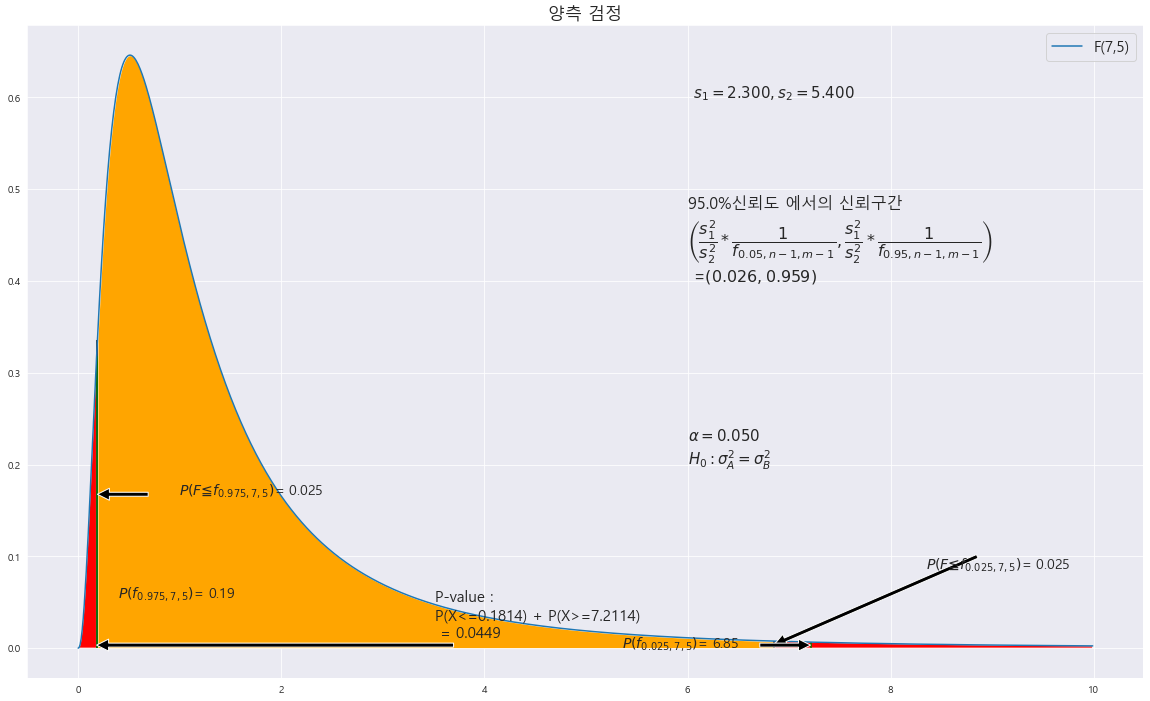

In [10]:





X = np.arange(0,10, .01)

fig = plt.figure(figsize=(20,12))


# A = '0.8 1.8 1.0 0.1 0.9 1.7 1.4 1.0 0.9 1.2 0.5'
# B = '1.0 0.8 1.6 2.6 1.3 1.1 2.4 1.8 2.5 1.4 1.9 2.0 1.2'
#
# A= list(map(float , A.split(' ')))
# B = list(map(float , B.split(' ')))

# Vars = np.var(A , ddof=1)
# Vars = 0.2**2
n = 8
m = 6
dof = [[n-1 , m-1]] #자유도

trust = 95
trust = round((1- trust/100)/2,3)



# sample_x = np.mean(A)
stand_x = 2.3
# print(f'|x : {sample_x}')
# print(f's_x : {stand_x}')
# sample_y = np.mean(B)
stand_y = 5.4
# print(f'|y : {sample_y}')
# print(f's_y : {stand_y}')
#
# STDS = math.sqrt(Vars)
# MO_std = 0.3


for i in dof:
    ax = sns.lineplot(X , scipy.stats.f(i[0] , i[1]).pdf(X))




X_r = scipy.stats.f(dof[0][0], dof[0][1]).ppf(1-trust)

X_l = scipy.stats.f(dof[0][0], dof[0][1]).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)



ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/2), xytext=(X_r+2 ,.1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2), xytext=(X_l + .5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2)  , arrowprops = dict(facecolor = 'black'))
area = round(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_r) ,4)
ax.text(X_r+1.5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) + .08 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)
ax.text(X_l + .8 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)

ax.text(X_l + 0.2 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/6 , r'$P(f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) +   f'= {round(X_l , 2)}' , fontsize = 14)
ax.text(X_r - 1.5, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/6, r'$P(f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1])  + f'= {round(X_r , 2)}'  , fontsize = 14)


ax.text(6 , 0.6 , r' $s_1 = {%.3f} , s_2 = {%.3f}$' %(stand_x, stand_y), fontsize = 15)
ax.text(6 , 0.4 , f'{ (1- (trust*2))*100}%신뢰도 에서의 신뢰구간\n' + r'$\left(\dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.05 , n-1 , m-1}} , \dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.95 , n-1 , m-1}}\right)$' + f'\n =' + r'$\left( {%.3f} , {%.3f} \right)$' % (round(stand_x**2 / stand_y**2 / X_r,4) , round(stand_x**2 / stand_y**2 / X_l,4))  , fontsize = 16)

ax.text(6 , 0.2 ,  r'$\alpha = {%.3f}$' % ((area*2)) +'\n' + r'$H_0 : \sigma^2_A = \sigma^2_B$' , Fontsize = 15 )

# #=================================가설검정=====================================
#
ax.set_title('양측 검정' , fontsize = 17)
#
X_L_1 = stand_x**2 / stand_y**2 #검정값

X_L_1 = abs(round(X_L_1,4))
if scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1) < 0.5:
    X_R_1 = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1))),4)
else:
    X_R_1 = X_L_1
    X_L_1 = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1))),4)
print(f'X_R_1 : {X_R_1}' )
print(f'X_L_1 : {X_L_1}' )

ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_R_1) | (X<=X_L_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔
#
area = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1) + 1 - (scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_R_1))),4)
#
#
ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.f(dof[0][0] , dof[0][1]).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.f(dof[0][0] , dof[0][1]).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# #
annotate_len = stats.f(dof[0][0] , dof[0][1]).pdf(X_R_1) /2
plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1+X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1) -.5, annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_R_1-X_L_1)/2 , annotate_len+0.008 , f'P-value : \nP(X<={X_L_1}) + P(X>={X_R_1}) \n = {area}',fontsize=15)

b = ['F({},{})'.format(i,j) for i,j in dof]
plt.legend(b , fontsize= 15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3.178893104458269
X_R_1 : 1.25
X_L_1 : 0.8


<ipython-input-11-98fc0116c670>:69: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(6 , 0.2 ,  r'$\alpha = {%.3f}$' % ((area*2)) +'\n' + r'$H_0 : \sigma^2_A = \sigma^2_B$' , Fontsize = 15 )


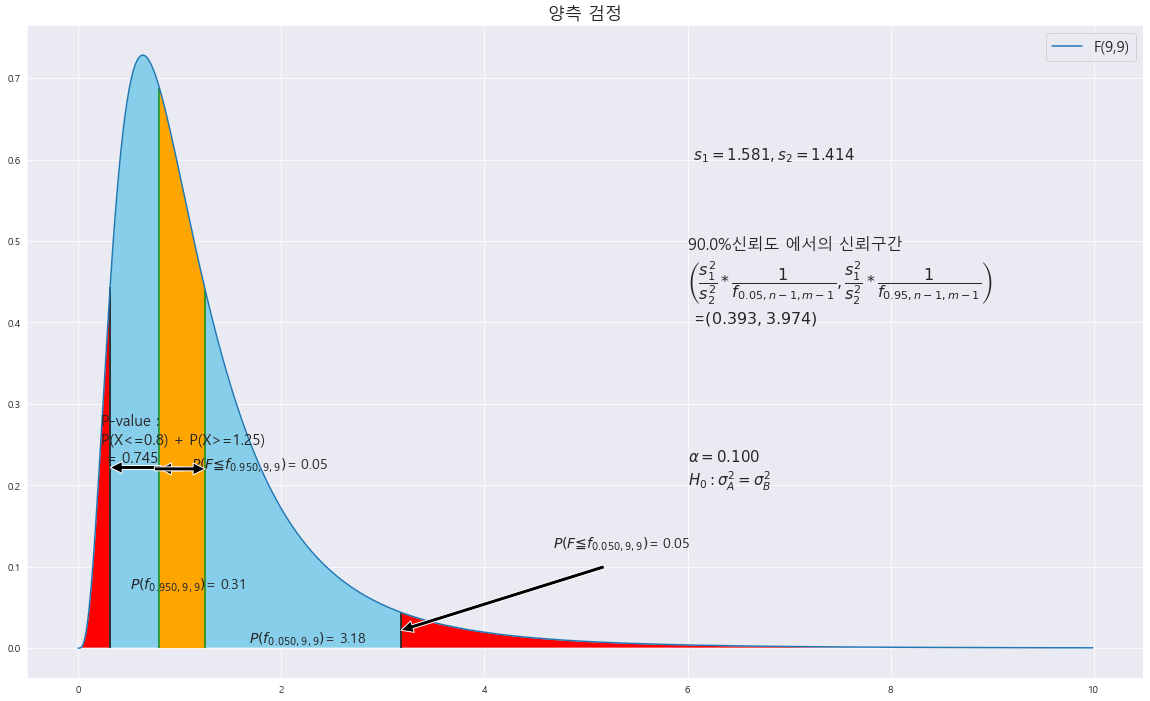

In [11]:





X = np.arange(0,10, .01)

fig = plt.figure(figsize=(20,12))


# A = '0.8 1.8 1.0 0.1 0.9 1.7 1.4 1.0 0.9 1.2 0.5'
# B = '1.0 0.8 1.6 2.6 1.3 1.1 2.4 1.8 2.5 1.4 1.9 2.0 1.2'
#
# A= list(map(float , A.split(' ')))
# B = list(map(float , B.split(' ')))

# Vars = np.var(A , ddof=1)
# Vars = 0.2**2
n = 10
m = 10
dof = [[n-1 , m-1]] #자유도

trust = 90
trust = round((1- trust/100)/2,3)



# sample_x = np.mean(A)
stand_x = math.sqrt(2.5)
# print(f'|x : {sample_x}')
# print(f's_x : {stand_x}')
# sample_y = np.mean(B)
stand_y = math.sqrt(2.0)
# print(f'|y : {sample_y}')
# print(f's_y : {stand_y}')
#
# STDS = math.sqrt(Vars)
# MO_std = 0.3


for i in dof:
    ax = sns.lineplot(X , scipy.stats.f(i[0] , i[1]).pdf(X))




X_r = scipy.stats.f(dof[0][0], dof[0][1]).ppf(1-trust)

X_l = scipy.stats.f(dof[0][0], dof[0][1]).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)



ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/2), xytext=(X_r+2 ,.1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2), xytext=(X_l + .5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2)  , arrowprops = dict(facecolor = 'black'))
area = round(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_r) ,4)
ax.text(X_r+1.5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) + .08 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)
ax.text(X_l + .8 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)

ax.text(X_l + 0.2 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/6 , r'$P(f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) +   f'= {round(X_l , 2)}' , fontsize = 14)
ax.text(X_r - 1.5, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/6, r'$P(f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1])  + f'= {round(X_r , 2)}'  , fontsize = 14)


ax.text(6 , 0.6 , r' $s_1 = {%.3f} , s_2 = {%.3f}$' %(stand_x, stand_y), fontsize = 15)
ax.text(6 , 0.4 , f'{ (1- (trust*2))*100}%신뢰도 에서의 신뢰구간\n' + r'$\left(\dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.05 , n-1 , m-1}} , \dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.95 , n-1 , m-1}}\right)$' + f'\n =' + r'$\left( {%.3f} , {%.3f} \right)$' % (round(stand_x**2 / stand_y**2 / X_r,4) , round(stand_x**2 / stand_y**2 / X_l,4))  , fontsize = 16)

ax.text(6 , 0.2 ,  r'$\alpha = {%.3f}$' % ((area*2)) +'\n' + r'$H_0 : \sigma^2_A = \sigma^2_B$' , Fontsize = 15 )

# #=================================가설검정=====================================
#
ax.set_title('양측 검정' , fontsize = 17)
#
X_L_1 = stand_x**2 / stand_y**2 #검정값

X_L_1 = abs(round(X_L_1,4))
if scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1) < 0.5:
    X_R_1 = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1))),4)
else:
    X_R_1 = X_L_1
    X_L_1 = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1))),4)
print(f'X_R_1 : {X_R_1}' )
print(f'X_L_1 : {X_L_1}' )

ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_R_1) | (X<=X_L_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔
#
area = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1) + 1 - (scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_R_1))),4)
#
#
ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.f(dof[0][0] , dof[0][1]).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.f(dof[0][0] , dof[0][1]).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# #
annotate_len = stats.f(dof[0][0] , dof[0][1]).pdf(X_R_1) /2
plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1+X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1) -.5, annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_R_1-X_L_1)/2 , annotate_len+0.008 , f'P-value : \nP(X<={X_L_1}) + P(X>={X_R_1}) \n = {area}',fontsize=15)

b = ['F({},{})'.format(i,j) for i,j in dof]
plt.legend(b , fontsize= 15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3.122711726303326


<ipython-input-12-4f0bfef3f090>:69: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(6 , 0.2 ,  r'$\alpha = {%.3f}$' % ((area*2)) +'\n' + r'$H_0 : \sigma^2_A = \sigma^2_B$' , Fontsize = 15 )


X_R_1 : 3.8058
X_L_1 : 0.2075


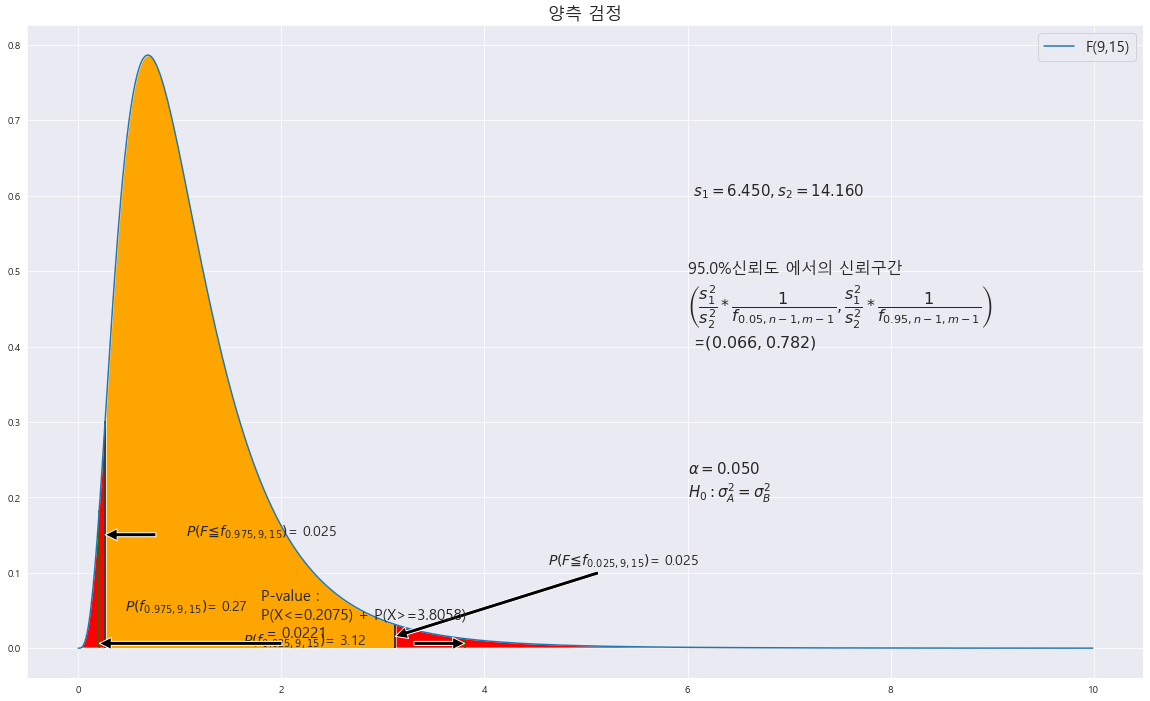

In [12]:





X = np.arange(0,10, .01)

fig = plt.figure(figsize=(20,12))


# A = '0.8 1.8 1.0 0.1 0.9 1.7 1.4 1.0 0.9 1.2 0.5'
# B = '1.0 0.8 1.6 2.6 1.3 1.1 2.4 1.8 2.5 1.4 1.9 2.0 1.2'
#
# A= list(map(float , A.split(' ')))
# B = list(map(float , B.split(' ')))

# Vars = np.var(A , ddof=1)
# Vars = 0.2**2
n = 10
m = 16
dof = [[n-1 , m-1]] #자유도

trust = 95
trust = round((1- trust/100)/2,3)



# sample_x = np.mean(A)
stand_x = 6.45
# print(f'|x : {sample_x}')
# print(f's_x : {stand_x}')
# sample_y = np.mean(B)
stand_y = 14.16
# print(f'|y : {sample_y}')
# print(f's_y : {stand_y}')
#
# STDS = math.sqrt(Vars)
# MO_std = 0.3


for i in dof:
    ax = sns.lineplot(X , scipy.stats.f(i[0] , i[1]).pdf(X))




X_r = scipy.stats.f(dof[0][0], dof[0][1]).ppf(1-trust)

X_l = scipy.stats.f(dof[0][0], dof[0][1]).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)



ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X<=X_r) & (X>=X_l) , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/2), xytext=(X_r+2 ,.1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2), xytext=(X_l + .5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2)  , arrowprops = dict(facecolor = 'black'))
area = round(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_r) ,4)
ax.text(X_r+1.5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) + .08 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)
ax.text(X_l + .8 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)

ax.text(X_l + 0.2 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/6 , r'$P(f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) +   f'= {round(X_l , 2)}' , fontsize = 14)
ax.text(X_r - 1.5, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/6, r'$P(f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1])  + f'= {round(X_r , 2)}'  , fontsize = 14)


ax.text(6 , 0.6 , r' $s_1 = {%.3f} , s_2 = {%.3f}$' %(stand_x, stand_y), fontsize = 15)
ax.text(6 , 0.4 , f'{ (1- (trust*2))*100}%신뢰도 에서의 신뢰구간\n' + r'$\left(\dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.05 , n-1 , m-1}} , \dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.95 , n-1 , m-1}}\right)$' + f'\n =' + r'$\left( {%.3f} , {%.3f} \right)$' % (round(stand_x**2 / stand_y**2 / X_r,4) , round(stand_x**2 / stand_y**2 / X_l,4))  , fontsize = 16)

ax.text(6 , 0.2 ,  r'$\alpha = {%.3f}$' % ((area*2)) +'\n' + r'$H_0 : \sigma^2_A = \sigma^2_B$' , Fontsize = 15 )

# #=================================가설검정=====================================
#
ax.set_title('양측 검정' , fontsize = 17)
#
X_L_1 = stand_x**2 / stand_y**2 #검정값

X_L_1 = abs(round(X_L_1,4))
if scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1) < 0.5:
    X_R_1 = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1))),4)
else:
    X_R_1 = X_L_1
    X_L_1 = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1))),4)
print(f'X_R_1 : {X_R_1}' )
print(f'X_L_1 : {X_L_1}' )

ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_R_1) | (X<=X_L_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_r) | (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔
#
area = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1) + 1 - (scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_R_1))),4)
#
#
ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.f(dof[0][0] , dof[0][1]).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.f(dof[0][0] , dof[0][1]).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# #
annotate_len = stats.f(dof[0][0] , dof[0][1]).pdf(X_R_1) /2
plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1+X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1) -.5, annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_R_1-X_L_1)/2 , annotate_len+0.008 , f'P-value : \nP(X<={X_L_1}) + P(X>={X_R_1}) \n = {area}',fontsize=15)

b = ['F({},{})'.format(i,j) for i,j in dof]
plt.legend(b , fontsize= 15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3.0061019723688758
X_R_1 : 4.8196


<ipython-input-13-d8434ac98bf3>:71: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(6 , 0.2 ,  r'$\alpha = {%.3f}$' % ((area)) +'\n' + r'$H_0 : \sigma^2_A = \sigma^2_B$' , Fontsize = 15 )


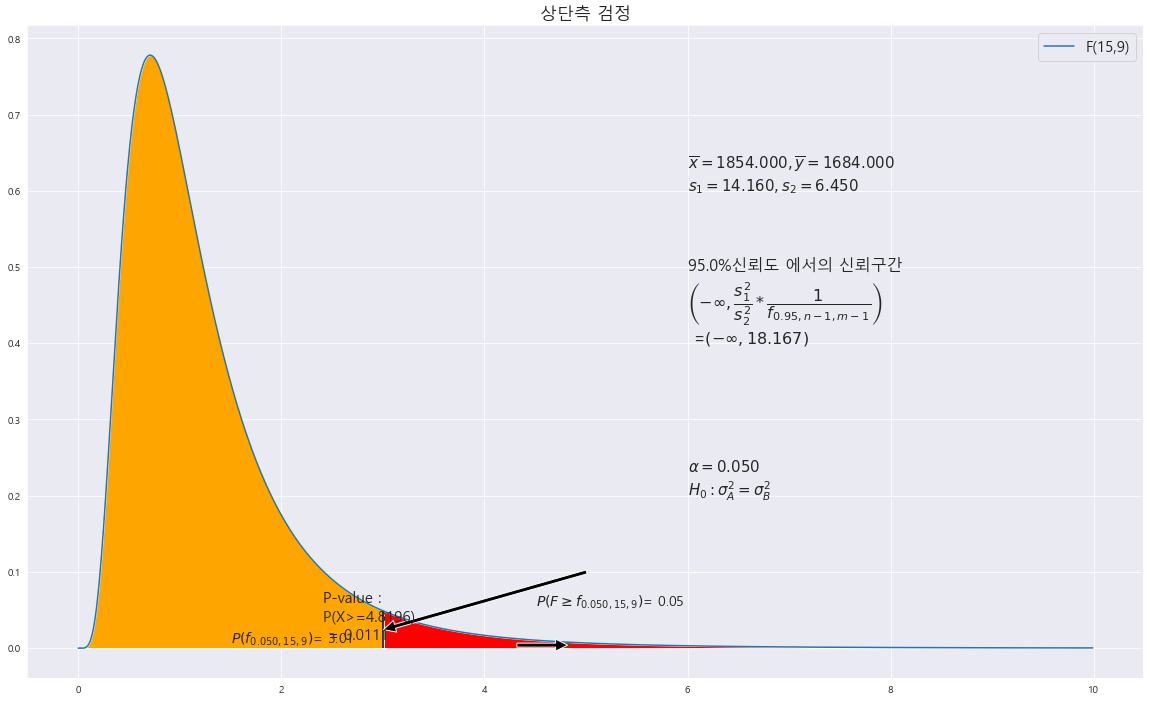

In [13]:
X = np.arange(0,10, .01)

fig = plt.figure(figsize=(20,12))


# A = '72 75 75 80 100 110 125 150 160 200'
# B = '50 60 72 90 100 125 125 130 132 170'
#
# A = list(map(int , A.split()))
# B = list(map(int ,B.split()))

# Vars = np.var(A , ddof=1)
# Vars = 0.2**2
n = 16
m = 10
dof = [[n-1 , m-1]] #자유도

trust = 95
trust = round((1- trust/100),3)


#
# sample_x = 1854
stand_x = 14.16
# print(f'|x : {sample_x}')
# print(f's_x : {stand_x}')
# sample_y = 1684
stand_y = 6.45
# print(f'|y : {sample_y}')
# print(f's_y : {stand_y}')
#
# STDS = math.sqrt(Vars)
# MO_std = 0.3




for i in dof:
    ax = sns.lineplot(X , scipy.stats.f(i[0] , i[1]).pdf(X))




X_r = scipy.stats.f(dof[0][0], dof[0][1]).ppf(1-trust)

# X_l = scipy.stats.f(dof[0][0], dof[0][1]).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(X_r)



ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X<=X_r)  , facecolor = 'orange')



ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) , colors = 'black')
# ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l) , colors = 'black')
plt.annotate('' , xy=(X_r , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/2), xytext=(X_r+2 ,.1)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(X_l , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2), xytext=(X_l + .5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2)  , arrowprops = dict(facecolor = 'black'))
area = round(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_r) ,4)
ax.text(X_r+1.5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) + .008 , r'$P(F\geq f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)
# ax.text(X_l + .8 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)

# ax.text(X_l + 0.2 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/6 , r'$P(f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) +   f'= {round(X_l , 2)}' , fontsize = 14)
ax.text(X_r - 1.5, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/6, r'$P(f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1])  + f'= {round(X_r , 2)}'  , fontsize = 14)


ax.text(6 , 0.6 , r'$\overline{x} = {%.3f} , \overline{y} = {%.3f}$' % (sample_x, sample_y) + f'\n' + r'$s_1 = {%.3f} , s_2 = {%.3f}$' %(stand_x, stand_y), fontsize = 15)
ax.text(6 , 0.4 , f'{ (1- (trust))*100}%신뢰도 에서의 신뢰구간\n' + r'$\left(-\infty , \dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.95 , n-1 , m-1}}\right)$' + f'\n =' + r'$\left(-\infty , {%.3f} \right)$' % (round(stand_x**2 / stand_y**2 / X_l,4))  , fontsize = 16)

ax.text(6 , 0.2 ,  r'$\alpha = {%.3f}$' % ((area)) +'\n' + r'$H_0 : \sigma^2_A = \sigma^2_B$' , Fontsize = 15 )

# #=================================가설검정=====================================
ax.set_title('상단측 검정' , fontsize = 17)
X_L_1 = stand_x**2 / stand_y**2 #검정값

X_L_1 = abs(round(X_L_1,4))
if scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1) < 0.5:
    X_R_1 = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1))),4)
else:
    X_R_1 = X_L_1
    X_L_1 = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1))),4)
print(f'X_R_1 : {X_R_1}' )
# print(f'X_L_1 : {X_L_1}' )

ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_R_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where = (X>=X_r)  , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔
#
area = round(float( 1 - (scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_R_1))),4)
#
# #
# ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.f(dof[0][0] , dof[0][1]).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.f(dof[0][0] , dof[0][1]).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# #
annotate_len = stats.f(dof[0][0] , dof[0][1]).pdf(X_R_1) /2
# plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1+X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1) -.5, annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_R_1)/2 , annotate_len+0.008 , f'P-value : \nP(X>={X_R_1}) \n = {area}',fontsize=15)

b = ['F({},{})'.format(i,j) for i,j in dof]
plt.legend(b , fontsize= 15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


X_R_1 : 3.8058
X_L_1 : 0.2075


<ipython-input-14-064aa5a0a1a8>:69: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(6 , 0.2 ,  r'$\alpha = {%.3f}$' % ((area)) +'\n' + r'$H_0 : \sigma^2_A = \sigma^2_B$' , Fontsize = 15 )


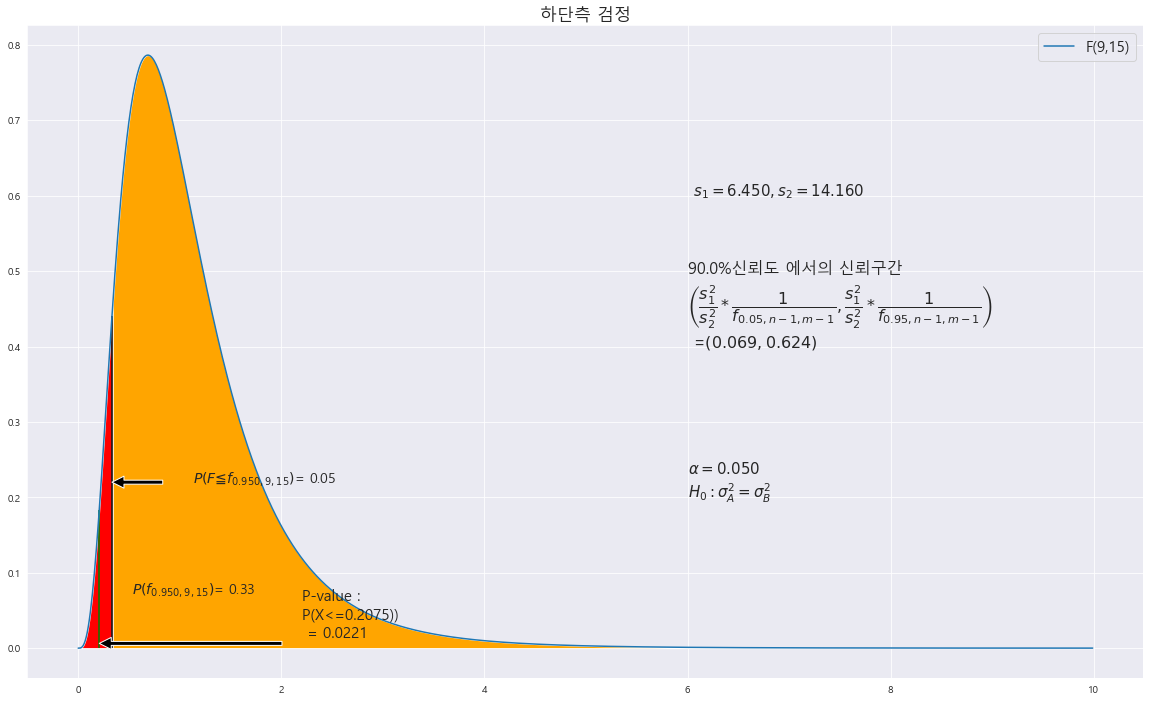

In [14]:





X = np.arange(0,10, .01)

fig = plt.figure(figsize=(20,12))


# A = '0.8 1.8 1.0 0.1 0.9 1.7 1.4 1.0 0.9 1.2 0.5'
# B = '1.0 0.8 1.6 2.6 1.3 1.1 2.4 1.8 2.5 1.4 1.9 2.0 1.2'
#
# A= list(map(float , A.split(' ')))
# B = list(map(float , B.split(' ')))

# Vars = np.var(A , ddof=1)
# Vars = 0.2**2
n = 10
m = 16
dof = [[n-1 , m-1]] #자유도

trust = 95
trust = round((1- trust/100),3)



# sample_x = np.mean(A)
stand_x = 6.45
# print(f'|x : {sample_x}')
# print(f's_x : {stand_x}')
# sample_y = np.mean(B)
stand_y = 14.16
# print(f'|y : {sample_y}')
# print(f's_y : {stand_y}')
#
# STDS = math.sqrt(Vars)
# MO_std = 0.3


for i in dof:
    ax = sns.lineplot(X , scipy.stats.f(i[0] , i[1]).pdf(X))




# X_r = scipy.stats.f(dof[0][0], dof[0][1]).ppf(1-trust)

X_l = scipy.stats.f(dof[0][0], dof[0][1]).ppf(trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
# print(X_r)



ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where =  (X>=X_l) , facecolor = 'orange')


#
# ax.vlines(x = X_r ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) , colors = 'black')
ax.vlines(x = X_l ,ymin=0 , ymax= scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l) , colors = 'black')
# plt.annotate('' , xy=(X_r , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/2), xytext=(X_r+2 ,.1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(X_l , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2), xytext=(X_l + .5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2)  , arrowprops = dict(facecolor = 'black'))
area = round(scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_l) ,4)
# ax.text(X_r+1.5 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r) + .08 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)
ax.text(X_l + .8 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/2 , r'$P(F\leqq f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) + f'= {area}' , fontsize = 14)

ax.text(X_l + 0.2 , scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_l)/6 , r'$P(f_{%.3f,%2d,%2d})$' % (1-trust,dof[0][0] , dof[0][1]) +   f'= {round(X_l , 2)}' , fontsize = 14)
# ax.text(X_r - 1.5, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X_r)/6, r'$P(f_{%.3f,%2d,%2d})$' % (trust,dof[0][0] , dof[0][1])  + f'= {round(X_r , 2)}'  , fontsize = 14)


ax.text(6 , 0.6 , r' $s_1 = {%.3f} , s_2 = {%.3f}$' %(stand_x, stand_y), fontsize = 15)
ax.text(6 , 0.4 , f'{ (1- (trust*2))*100}%신뢰도 에서의 신뢰구간\n' + r'$\left(\dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.05 , n-1 , m-1}} , \dfrac{s^2_1}{s^2_2}*\dfrac{1}{f_{0.95 , n-1 , m-1}}\right)$' + f'\n =' + r'$\left( {%.3f} , {%.3f} \right)$' % (round(stand_x**2 / stand_y**2 / X_r,4) , round(stand_x**2 / stand_y**2 / X_l,4))  , fontsize = 16)

ax.text(6 , 0.2 ,  r'$\alpha = {%.3f}$' % ((area)) +'\n' + r'$H_0 : \sigma^2_A = \sigma^2_B$' , Fontsize = 15 )

# #=================================가설검정=====================================
#
ax.set_title('하단측 검정' , fontsize = 17)
#
X_L_1 = stand_x**2 / stand_y**2 #검정값

X_L_1 = abs(round(X_L_1,4))
if scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1) < 0.5:
    X_R_1 = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1))),4)
else:
    X_R_1 = X_L_1
    X_L_1 = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).ppf(1- scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1))),4)
print(f'X_R_1 : {X_R_1}' )
print(f'X_L_1 : {X_L_1}' )

ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where =  (X<=X_L_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.f(dof[0][0] , dof[0][1]).pdf(X) , 0 , where =  (X<=X_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔
#
area = round(float(scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_L_1) + 1 - (scipy.stats.f(dof[0][0] , dof[0][1]).cdf(X_R_1))),4)
#
#
ax.vlines(x= X_L_1, ymin= 0 , ymax= stats.f(dof[0][0] , dof[0][1]).pdf(X_L_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= X_R_1, ymin= 0 , ymax= stats.f(dof[0][0] , dof[0][1]).pdf(X_R_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# #
annotate_len = stats.f(dof[0][0] , dof[0][1]).pdf(X_R_1) /2
plt.annotate('' , xy=(X_L_1, annotate_len), xytext=((X_R_1+X_L_1)/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(X_R_1, annotate_len), xytext=((X_R_1) -.5, annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text( (X_L_1)+ 2 , annotate_len+0.008 , f'P-value : \nP(X<={X_L_1})) \n = {area}',fontsize=15)

b = ['F({},{})'.format(i,j) for i,j in dof]
plt.legend(b , fontsize= 15)

In [ ]:
import matplotlib.patches as patches


##################머신러닝 모듈 ################

from sklearn.model_selection import train_test_split #사이킷런 import
from sklearn.linear_model import LinearRegression

In [ ]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'

data = pd.read_csv(file_url)
data

In [ ]:
X = data[['age' , 'sex' , 'bmi' , 'children' , 'smoker']]  #독립변수

y = data['charges']  #종속변수


X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state= 100) #데이터 셋 분할
# test_size (시험 셋) ==> 20% , random_state = 100 ==> 랜덤 샘플링

#랜덤 샘플링이란 데이터를 특정 비율로 나눌 때 마구잡이로 뒤섞어서 나누는 것
#랜덤 샘플링을 진행하지 않는다면 데이터가 특정 순서로 정렬될 수 도 있다.

In [ ]:
model = LinearRegression()  #선형회귀에 사용할 model 객체를 생성했으니 model 객체를 사용해서 선형 회귀로 학습하고 예측할 수 있게 된다.and

model.fit(X_train , y_train)
#객체.fit(독립변수, 종속변수)
#학습시킨다의 의미 : 데이터를 모델 안에 넣어서 독립변수와 종속변수 간의 관계들을 분석해 새로운 데이터를 예측할 수 있는 상태로 만드는 것이다.

In [ ]:
pred = model.predict(X_test) #predict()함수로 예측을 할 수 있으며, 괄호 안에는 예측 대상을 넣어주면 된다.

In [ ]:
comparison = pd.DataFrame({'actual' : y_test, 'pred' : pred})
#예측한 값은 pred에 , tlfwp wjdqhsms y_test에 저장되어 있다.
#예측값이 얼마나 정확한지는 pred와 y_test를 비교하는 것으로 단순하게 확인할 수 있다.
comparison

In [ ]:
fig = plt.figure(figsize=(15,8))


x = comparison.iloc[:, 0].tolist()
y = comparison.iloc[: ,1].tolist()

# ax = sns.set_style('whitegrid')
ax = sns.scatterplot(x= x , y = y)
# ax = sns.lineplot(x= 'actual' , y = 'pred' , data = comparison)


ax.set_title('예측값 , 관찰값 산정' , fontsize=15)
ax.set_xlabel('실제값', fontsize = 15 , fontweight = 'bold')
ax.set_ylabel('예측값' , fontsize = 15 , fontweight = 'bold' , rotation = 0 , labelpad=25)

g_ell_center = (22000, 30000)
g_ell_width = 30000
g_ell_height = 8000
angle = 40.

g_ellipse = patches.Ellipse(g_ell_center, g_ell_width, g_ell_height, angle=angle, fill=False, edgecolor='yellow', linewidth=2)
ax.add_patch(g_ellipse)
plt.annotate('' , xy=(10000, 35000), xytext=(13000 , 30000)  , arrowprops = dict(facecolor = 'black'))
ax.text(5000 ,37000 , '실제값보다 예측값이 더 높게 나타났다.'  , fontsize = 13)



g_ell_center = (42000, 32000)
g_ell_width = 30000
g_ell_height = 8000
angle = 40.

g_ellipse = patches.Ellipse(g_ell_center, g_ell_width, g_ell_height, angle=angle, fill=False, edgecolor='blue', linewidth=2)
ax.add_patch(g_ellipse)
plt.annotate('' , xy=(50000, 25000), xytext=(48000 , 30000)  , arrowprops = dict(facecolor = 'black'))
ax.text(45000 ,22000 , '실제값보다 예측값이 더 높게 나타났다.'  , fontsize = 13)

In [15]:
import matplotlib.patches as patches


##################머신러닝 모듈 ################

from sklearn.model_selection import train_test_split #사이킷런 import
from sklearn.linear_model import LinearRegression

In [16]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'

data = pd.read_csv(file_url)
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [18]:
X = data[['age' , 'sex' , 'bmi' , 'children' , 'smoker']]  #독립변수

y = data['charges']  #종속변수


X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state= 100) #데이터 셋 분할
# test_size (시험 셋) ==> 20% , random_state = 100 ==> 랜덤 샘플링

#랜덤 샘플링이란 데이터를 특정 비율로 나눌 때 마구잡이로 뒤섞어서 나누는 것
#랜덤 샘플링을 진행하지 않는다면 데이터가 특정 순서로 정렬될 수 도 있다.

In [19]:
model = LinearRegression()  #선형회귀에 사용할 model 객체를 생성했으니 model 객체를 사용해서 선형 회귀로 학습하고 예측할 수 있게 된다.and

model.fit(X_train , y_train)
#객체.fit(독립변수, 종속변수)
#학습시킨다의 의미 : 데이터를 모델 안에 넣어서 독립변수와 종속변수 간의 관계들을 분석해 새로운 데이터를 예측할 수 있는 상태로 만드는 것이다.

LinearRegression()

In [20]:
pred = model.predict(X_test) #predict()함수로 예측을 할 수 있으며, 괄호 안에는 예측 대상을 넣어주면 된다.

In [21]:
comparison = pd.DataFrame({'actual' : y_test, 'pred' : pred})
#예측한 값은 pred에 , tlfwp wjdqhsms y_test에 저장되어 있다.
#예측값이 얼마나 정확한지는 pred와 y_test를 비교하는 것으로 단순하게 확인할 수 있다.
comparison

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


Text(45000, 22000, '실제값보다 예측값이 더 높게 나타났다.')

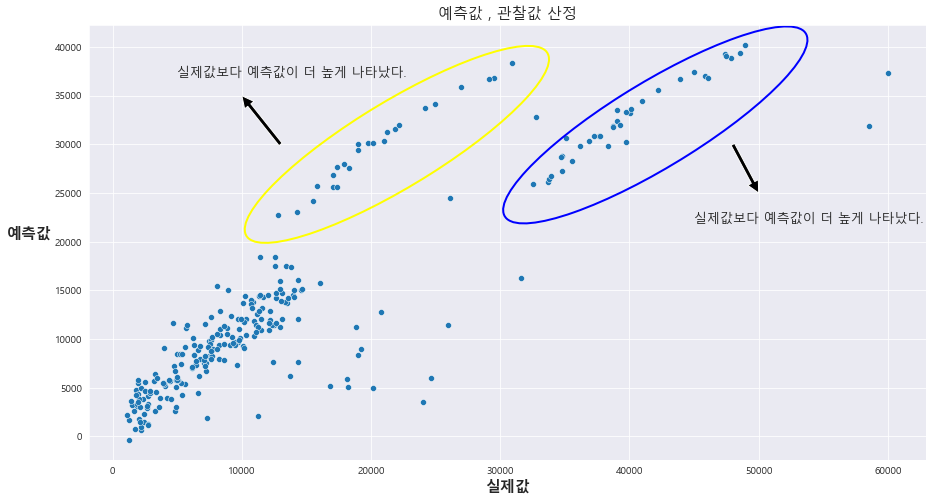

In [22]:
fig = plt.figure(figsize=(15,8))


x = comparison.iloc[:, 0].tolist()
y = comparison.iloc[: ,1].tolist()

# ax = sns.set_style('whitegrid')
ax = sns.scatterplot(x= x , y = y)
# ax = sns.lineplot(x= 'actual' , y = 'pred' , data = comparison)


ax.set_title('예측값 , 관찰값 산정' , fontsize=15)
ax.set_xlabel('실제값', fontsize = 15 , fontweight = 'bold')
ax.set_ylabel('예측값' , fontsize = 15 , fontweight = 'bold' , rotation = 0 , labelpad=25)

g_ell_center = (22000, 30000)
g_ell_width = 30000
g_ell_height = 8000
angle = 40.

g_ellipse = patches.Ellipse(g_ell_center, g_ell_width, g_ell_height, angle=angle, fill=False, edgecolor='yellow', linewidth=2)
ax.add_patch(g_ellipse)
plt.annotate('' , xy=(10000, 35000), xytext=(13000 , 30000)  , arrowprops = dict(facecolor = 'black'))
ax.text(5000 ,37000 , '실제값보다 예측값이 더 높게 나타났다.'  , fontsize = 13)



g_ell_center = (42000, 32000)
g_ell_width = 30000
g_ell_height = 8000
angle = 40.

g_ellipse = patches.Ellipse(g_ell_center, g_ell_width, g_ell_height, angle=angle, fill=False, edgecolor='blue', linewidth=2)
ax.add_patch(g_ellipse)
plt.annotate('' , xy=(50000, 25000), xytext=(48000 , 30000)  , arrowprops = dict(facecolor = 'black'))
ax.text(45000 ,22000 , '실제값보다 예측값이 더 높게 나타났다.'  , fontsize = 13)